# Notebook de la práctica 2 de **FAA**.

**Javier López Cano y Gonzalo Madrigal.** Grupo 1462.

In [1]:
# -*- coding: utf-8 -*-

# coding: utf-8
import sklearn
from Datos import Datos
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from Clasificador import Clasificador, ClasificadorNaiveBayes, ClasificadorVecinosProximos, ClasificadorRegresionLogistica
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from IPython.display import HTML, display
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import matplotlib.pyplot as	 plt

from EstrategiaParticionado import EstrategiaParticionado

Función para representar gráficamente los valores para la **curva ROC**.

In [2]:
def repr_grafica(nombre, xlabel, ylabel, num_lines, line_labels, colors, x, y):
	plt.figure()
	lw = 2
	for i in range(0, num_lines):
		plt.plot(x[i], y[i], color=colors[i], lw=lw, label=line_labels[i])

	plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
	plt.xlim([0.0, 1.0])
	plt.ylim([0.0, 1.05])
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.title(nombre)
	plt.legend(loc="lower right")
	plt.show()



Función para sacar los valores **ROC** para la curva.

In [3]:

def valores_roc(data, pred):
	fp = 0
	fn = 0
	tp = 0
	tn = 0
	for i in range(0, len(pred)):
		if pred[i] == data[i]:
			if pred[i] == 1:
				tp += 1
			elif pred[i] == 0:
				tn += 1
		elif pred[i] != data[i]:
			if pred[i] == 1:
				fp += 1
			elif pred[i] == 0:
				fn += 1
	return tp, tn, fp, fn


Procesamos los dos ficheros de datos con los que vamos a trabajar: *diabetes* y *wdbc*.

In [4]:

	diabetes = Datos("pima-indians-diabetes.data")
	wdbc = Datos("wdbc.data")
	
	print("Diabetes:\n")
	print("nominalAtributos:")
	print(diabetes.nominalAtributos)
	print("\nDiccionario:")
	print(diabetes.diccionario)
	print("\nDatos:")
	print(diabetes.datos)

	print("\nValidacion Cruzada NB")
	print("\nValidando con clasificador propio:")
	nb = ClasificadorNaiveBayes()
	vc = ValidacionCruzada()
	error = Clasificador.validacion(vc, diabetes, nb)
	print("\n Error medio:")
	print("sin Laplace: " + str(error[0]))
	print("con Laplace: " + str(error[1]))



Diabetes:

nominalAtributos:
[False, False, False, False, False, False, False, False, True]

Diccionario:
{'Pregs': {}, 'Plas': {}, 'Pres': {}, 'Skin': {}, 'Test': {}, 'Mass': {}, 'Pedi': {}, 'Age': {}, 'Class': {'0': 0, '1': 1}}

Datos:
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Validacion Cruzada NB

Validando con clasificador propio:
Error en partición 0[0.4473684210526316, 0.4473684210526316]
Error en partición 1[0.35526315789473684, 0.35526315789473684]
Error en partición 2[0.32894736842105265, 0.32894736842105265]
Error en partición 3[0.3157894736842105, 0.3157894736842105]
Error en partición 4[0.27631578947368424, 0.27631578947368424]
Error en partición 5[0.34210526315789475, 0.342105263157

En esta práctica hemos implementado el método de clasificación **KNN**, que se basa en asignar una clase a un elemento a partir de la de los K elementos más próximos. La elección de este número es clave; una K demasiado pequeña (1) significa que estamos clasificando el elemento mirando únicamente el objeto más cercano, perdiendo así toda la potencia del algoritmo. Una k demasiado grande nos lleva a clasificar el elemento en la clase más numerosa. La elección de una k correcta depende de los datos con los que estemos trabajando.

Al tratar los atributos de cada elemento como valores de un vector, los vecinos más próximos cambiarán según el método que elijamos para calcular la distancia. En este caso probaremos con la distancia **euclidea**, la **manhattan** y la **mahalanobis**.

Otra cosa a tener en cuenta a la hora de aplicar este método es si asignamos distintos pesos a los vecinos según su proximidad.

Lo que vamos a observar es que cuantos más vecinos cojamos, más índice de éxito vamos a obtener. Esto ocurre cuando hay cierto ruido en las nubes de datos. Además vemos que la distancia Mahalanobis funciona ligeramente peor que las otras dos, por lo tanto, en este caso no nos interesa tener en cuenta la correlación como hace **Mahalanobis**.

In [5]:

	print("\nValidacion Cruzada K-NN")
	print("\nValidando con clasificador propio:")
	knn = ClasificadorVecinosProximos()
	vc = ValidacionCruzada()
	error = Clasificador.validacion(vc, diabetes, knn)
	print("\nError medio k=1")
	print("euclidea: " + str(error[0]))
	print("manhattan: " + str(error[1]))
	print("mahalanobis: " + str(error[2]))
	print("\nError medio k=5")
	print("euclidea: " + str(error[3]))
	print("manhattan: " + str(error[4]))
	print("mahalanobis: " + str(error[5]))
	print("\nError medio k=11")
	print("euclidea: " + str(error[6]))
	print("manhattan: " + str(error[7]))
	print("mahalanobis: " + str(error[8]))
	print("\nError medio k=21")
	print("euclidea: " + str(error[9]))
	print("manhattan: " + str(error[10]))
	print("mahalanobis: " + str(error[11]))



Validacion Cruzada K-NN

Validando con clasificador propio:
Error en partición 0[0.27631578947368424, 0.3157894736842105, 0.2894736842105263, 0.21052631578947367, 0.25, 0.27631578947368424, 0.21052631578947367, 0.23684210526315788, 0.19736842105263158, 0.25, 0.21052631578947367, 0.23684210526315788]
Error en partición 1[0.2894736842105263, 0.2631578947368421, 0.23684210526315788, 0.18421052631578946, 0.2236842105263158, 0.23684210526315788, 0.2236842105263158, 0.18421052631578946, 0.21052631578947367, 0.19736842105263158, 0.2236842105263158, 0.2236842105263158]
Error en partición 2[0.35526315789473684, 0.3684210526315789, 0.39473684210526316, 0.2894736842105263, 0.2631578947368421, 0.3157894736842105, 0.2236842105263158, 0.2631578947368421, 0.2894736842105263, 0.32894736842105265, 0.2894736842105263, 0.2894736842105263]
Error en partición 3[0.25, 0.2631578947368421, 0.2236842105263158, 0.2236842105263158, 0.19736842105263158, 0.23684210526315788, 0.17105263157894737, 0.197368421052631

En esta práctica hemos implementado también el clasificador por **regresión logistica**. En este método se ajusta una función de regresión para predecir el valor de una variable dependiente a partir de una serie de valores independientes. Al aplicar este algoritmo se deben tener en cuenta dos cuestiones: la **constante de arendizaje** y el **número de épocas** que vamos a aplicar.

La constante de aprendizaje es el tamaño de los "pasos" que vamos a dar para aproximar nuestra función logística a la máxima eficacia posible. El número de épocas será el número de pasos que daremos para acercarnos a este punto. 

Llegará un punto en el que nuestra función no pueda aproximarse más y no mejoremos los resultados con cada época, sino que iremos ajustando y desajustando contínuamente nuestra función.

In [6]:

	print("\nValidacion Cruzada Regresión Logística")
	print("\nValidando con clasificador propio:")
	reg = ClasificadorRegresionLogistica()
	vc = ValidacionCruzada()
	error = Clasificador.validacion(vc, diabetes, reg)
	print("\n Error medio: " + str(error))



Validacion Cruzada Regresión Logística

Validando con clasificador propio:
Error en partición 0[0.6842105263157895]
Error en partición 1[0.5789473684210527]
Error en partición 2[0.6842105263157895]
Error en partición 3[0.5921052631578947]
Error en partición 4[0.6973684210526315]
Error en partición 5[0.618421052631579]
Error en partición 6[0.6973684210526315]
Error en partición 7[0.6710526315789473]
Error en partición 8[0.6842105263157895]
Error en partición 9[0.5657894736842105]

 Error medio: [0.6473684210526315]


Probamos nuestras implementaciones con los datos de *wdbc*.

In [7]:

	print("\n\nWdbc:\n")
	print("nominalAtributos:")
	print(wdbc.nominalAtributos)
	print("\nDiccionario:")
	print(wdbc.diccionario)
	print("\nDatos:")
	print(wdbc.datos)

	print("\n\nWdbc:")

	print("\nValidacion Cruzada NB")
	print("\nValidando con clasificador propio:")
	nb = ClasificadorNaiveBayes()
	vc = ValidacionCruzada()
	error = Clasificador.validacion(vc, wdbc, nb)
	print("\n Error medio:")
	print("sin Laplace: " + str(error[0]))
	print("con Laplace: " + str(error[1]))




Wdbc:

nominalAtributos:
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]

Diccionario:
{'Atributo1': {}, 'Atributo2': {}, 'Atributo3': {}, 'Atributo4': {}, 'Atributo5': {}, 'Atributo6': {}, 'Atributo7': {}, 'Atributo8': {}, 'Atributo9': {}, 'Atributo10': {}, 'Atributo11': {}, 'Atributo12': {}, 'Atributo13': {}, 'Atributo14': {}, 'Atributo15': {}, 'Atributo16': {}, 'Atributo17': {}, 'Atributo18': {}, 'Atributo19': {}, 'Atributo20': {}, 'Atributo21': {}, 'Atributo22': {}, 'Atributo23': {}, 'Atributo24': {}, 'Atributo25': {}, 'Atributo26': {}, 'Atributo27': {}, 'Atributo28': {}, 'Atributo29': {}, 'Atributo30': {}, 'Class': {'B': 0, 'M': 1}}

Datos:
[[1.799e+01 1.038e+01 1.228e+02 ... 4.601e-01 1.189e-01 1.000e+00]
 [2.057e+01 1.777e+01 1.329e+02 ... 2.750e-01 8.902e-02 1.000e+00]
 [1.969e+01 2.125e+01 1.300e+02 ... 3.613

In [8]:
	print("\nValidacion Cruzada K-NN")
	print("\nValidando con clasificador propio:")
	knn = ClasificadorVecinosProximos()
	vc = ValidacionCruzada()
	error = Clasificador.validacion(vc, wdbc, knn)
	print("\nError medio k=1")
	print("euclidea: " + str(error[0]))
	print("manhattan: " + str(error[1]))
	print("mahalanobis: " + str(error[2]))
	print("\nError medio k=5")
	print("euclidea: " + str(error[3]))
	print("manhattan: " + str(error[4]))
	print("mahalanobis: " + str(error[5]))
	print("\nError medio k=11")
	print("euclidea: " + str(error[6]))
	print("manhattan: " + str(error[7]))
	print("mahalanobis: " + str(error[8]))
	print("\nError medio k=21")
	print("euclidea: " + str(error[9]))
	print("manhattan: " + str(error[10]))
	print("mahalanobis: " + str(error[11]))


Validacion Cruzada K-NN

Validando con clasificador propio:
Error en partición 0[0.05357142857142857, 0.07142857142857142, 0.10714285714285714, 0.017857142857142856, 0.017857142857142856, 0.14285714285714285, 0.017857142857142856, 0.017857142857142856, 0.19642857142857142, 0.017857142857142856, 0.017857142857142856, 0.26785714285714285]
Error en partición 1[0.05357142857142857, 0.05357142857142857, 0.2857142857142857, 0.03571428571428571, 0.03571428571428571, 0.2857142857142857, 0.03571428571428571, 0.05357142857142857, 0.32142857142857145, 0.07142857142857142, 0.07142857142857142, 0.35714285714285715]
Error en partición 2[0.03571428571428571, 0.017857142857142856, 0.16071428571428573, 0.017857142857142856, 0.017857142857142856, 0.23214285714285715, 0.03571428571428571, 0.03571428571428571, 0.25, 0.03571428571428571, 0.07142857142857142, 0.25]
Error en partición 3[0.07142857142857142, 0.05357142857142857, 0.16071428571428573, 0.05357142857142857, 0.05357142857142857, 0.214285714285714

In [9]:
	print("\nValidacion Cruzada Regresión Logística")
	print("\nValidando con clasificador propio:")
	reg = ClasificadorRegresionLogistica()
	vc = ValidacionCruzada()
	error = Clasificador.validacion(vc, wdbc, reg)
	print("\nError medio: " + str(error))



Validacion Cruzada Regresión Logística

Validando con clasificador propio:
Error en partición 0[0.10714285714285714]
Error en partición 1[0.16071428571428573]
Error en partición 2[0.05357142857142857]
Error en partición 3[0.125]
Error en partición 4[0.10714285714285714]
Error en partición 5[0.10714285714285714]
Error en partición 6[0.08928571428571429]
Error en partición 7[0.017857142857142856]
Error en partición 8[0.07142857142857142]
Error en partición 9[0.03571428571428571]

Error medio: [0.0875]


Tras aplicar los tres métodos de clasificación implementados hasta ahora en las prácticas de FAA, la conclusión que podemos sacar es que no existe uno que funcione siempre mejor que los demás. En este caso, tenemos dos datasets relativamente pequeños, y esto beneficia a **KNN**. La principal ventaja que tiene KNN es que no necesita entrenamiento, únicamente tiene que tener la información de los elementos para calcular cuales son los más próximos. Además tanto la **regresión logística** como KNN son resistentes al problema de probabilidad 0 que tiene **Naive-Bayes**. La principal ventaja que tiene la regresión logística es que es un algoritmo muy sencillo y rápido, y cuando tenemos que realizar la operación de clasificación muchas veces, esta puede ser una opción muy interesante.

A continuación probamos la versión de **sklearn** de los algoritmos implementados para comparar rendimiento y resultados.

In [10]:
	# SKLEARN

	X = diabetes.datos[:, :-1]
	Y = diabetes.datos[:, -1]
	x = np.transpose(X)

	X2 = wdbc.datos[:, :-1]
	Y2 = wdbc.datos[:, -1]
	x2 = np.transpose(X2)
	

In [11]:
	print("\n\nDiabetes:")
	
	####################################################################################################################
	print("************Knn SKLEARN************\n")
	print("\nK = 1\n")
	clf = KNeighborsClassifier(n_neighbors=1, p=2, metric='euclidean')
	score = cross_val_score(clf, X, Y, cv=10, n_jobs=-1)
	error_media_sk = 1 - score.mean()
	error_std_sk = score.std()
	print("Error medio sklearn euclidean: " + str(error_media_sk))
	print("Desviación media del error sklearn euclidean: " + str(error_std_sk))



Diabetes:
************Knn SKLEARN************


K = 1

Error medio sklearn euclidean: 0.32033492822966514
Desviación media del error sklearn euclidean: 0.0558822618136192


In [12]:

	clfM = KNeighborsClassifier(n_neighbors=1, p=2, metric='manhattan')
	scoreM = cross_val_score(clfM, X, Y, cv=10, n_jobs=-1)
	error_media_skM = 1 - scoreM.mean()
	error_std_skM = scoreM.std()
	print("Error medio sklearn manhattan: " + str(error_media_skM))
	print("Desviación media del error sklearn manhattan: " + str(error_std_skM))

Error medio sklearn manhattan: 0.3034347231715653
Desviación media del error sklearn manhattan: 0.060348798218458996


In [13]:

	clfMahalan = KNeighborsClassifier(n_neighbors=1, p=2, metric='mahalanobis', metric_params={'V': np.cov(x)})
	scoreMahalan = cross_val_score(clfMahalan, X, Y, cv=10, n_jobs=-1)
	error_media_skMahalan = 1 - scoreMahalan.mean()
	error_std_skMahalan = scoreMahalan.std()
	print("Error medio sklearn mahalanobis: " + str(error_media_skMahalan))
	print("Desviación media del error sklearn mahalanobis: " + str(error_std_skMahalan))

Error medio sklearn mahalanobis: 0.30080314422419696
Desviación media del error sklearn mahalanobis: 0.036193226592899995


In [14]:
	print("\nK = 3\n")
	clf3 = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')
	score3 = cross_val_score(clf3, X, Y, cv=10, n_jobs=-1)
	error_media_sk3 = 1 - score3.mean()
	error_std_sk3 = score3.std()
	print("Error medio sklearn euclidean: " + str(error_media_sk3))
	print("Desviación media del error sklearn euclidean: " + str(error_std_sk3))


K = 3

Error medio sklearn euclidean: 0.29694121667805873
Desviación media del error sklearn euclidean: 0.037633581489763236


In [15]:

	clf3M = KNeighborsClassifier(n_neighbors=3, p=2, metric='manhattan')
	score3M = cross_val_score(clf3M, X, Y, cv=10, n_jobs=-1)
	error_media_sk3M = 1 - score3M.mean()
	error_std_sk3M = score3M.std()
	print("Error medio sklearn manhattan: " + str(error_media_sk3M))
	print("Desviación media del error sklearn manhattan: " + str(error_std_sk3M))


Error medio sklearn manhattan: 0.3046992481203008
Desviación media del error sklearn manhattan: 0.04480195236634037


In [16]:
	clf3Mahalan = KNeighborsClassifier(n_neighbors=3, p=2, metric='mahalanobis', metric_params={'V':np.cov(x)})
	score3Mahalan = cross_val_score(clf3Mahalan, X, Y, cv=10, n_jobs=-1)
	error_media_sk3Mahalan = 1 - score3Mahalan.mean()
	error_std_sk3Mahalan = score3Mahalan.std()
	print("Error medio sklearn mahalanobis: " + str(error_media_sk3Mahalan))
	print("Desviación media del error sklearn mahalanobis: " + str(error_std_sk3Mahalan))

Error medio sklearn mahalanobis: 0.2721462747778538
Desviación media del error sklearn mahalanobis: 0.0489354255249716


In [17]:
	print("\nK = 5\n")
	clf5 = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
	score5 = cross_val_score(clf5, X, Y, cv=10, n_jobs=-1)
	error_media_sk5 = 1 - score5.mean()
	error_std_sk5 = score5.std()
	print("Error medio sklearn euclidean: " + str(error_media_sk5))
	print("Desviación media del error sklearn euclidean: " + str(error_std_sk5))


K = 5

Error medio sklearn euclidean: 0.2786226930963773
Desviación media del error sklearn euclidean: 0.04416817250533367


In [18]:
	clf5M = KNeighborsClassifier(n_neighbors=5, p=2, metric='manhattan')
	score5M = cross_val_score(clf5M, X, Y, cv=10, n_jobs=-1)
	error_media_sk5M = 1 - score5M.mean()
	error_std_sk5M = score5M.std()
	print("Error medio sklearn manhattan: " + str(error_media_sk5M))
	print("Desviación media del error sklearn manhattan: " + str(error_std_sk5M))

Error medio sklearn manhattan: 0.27219753930280244
Desviación media del error sklearn manhattan: 0.03829478314215818


In [19]:

	clf5Mahalan = KNeighborsClassifier(n_neighbors=5, p=2, metric='mahalanobis', metric_params={'V': np.cov(x)})
	score5Mahalan = cross_val_score(clf5Mahalan, X, Y, cv=10, n_jobs=-1)
	error_media_sk5Mahalan = 1 - score5Mahalan.mean()
	error_std_sk5Mahalan = score5Mahalan.std()
	print("Error medio sklearn mahalanobis: " + str(error_media_sk5Mahalan))
	print("Desviación media del error sklearn mahalanobis: " + str(error_std_sk5Mahalan))

Error medio sklearn mahalanobis: 0.25391319207108665
Desviación media del error sklearn mahalanobis: 0.03911754982712483


In [20]:
	print("\nK = 11\n")
	clf11 = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
	score11 = cross_val_score(clf11, X, Y, cv=10, n_jobs=-1)
	error_media_sk11 = 1 - score11.mean()
	error_std_sk11 = score11.std()
	print("Error medio sklearn euclidean: " + str(error_media_sk11))
	print("Desviación media del error sklearn euclidean: " + str(error_std_sk11))


K = 11

Error medio sklearn euclidean: 0.26305536568694454
Desviación media del error sklearn euclidean: 0.04434762994630271


In [21]:
	clf11M = KNeighborsClassifier(n_neighbors=11, p=2, metric='manhattan')
	score11M = cross_val_score(clf11M, X, Y, cv=10, n_jobs=-1)
	error_media_sk11M = 1 - score11M.mean()
	error_std_sk11M = score11M.std()
	print("Error medio sklearn manhattan: " + str(error_media_sk11M))
	print("Desviación media del error sklearn manhattan: " + str(error_std_sk11M))

Error medio sklearn manhattan: 0.2603896103896104
Desviación media del error sklearn manhattan: 0.029941466999816774


In [22]:
	clf11Mahalan = KNeighborsClassifier(n_neighbors=11, p=2, metric='mahalanobis', metric_params={'V': np.cov(x)})
	score11Mahalan = cross_val_score(clf11Mahalan, X, Y, cv=10, n_jobs=-1)
	error_media_sk11Mahalan = 1 - score11Mahalan.mean()
	error_std_sk11Mahalan = score11Mahalan.std()
	print("Error medio sklearn mahalanobis: " + str(error_media_sk11Mahalan))
	print("Desviación media del error sklearn mahalanobis: " + str(error_std_sk11Mahalan))


Error medio sklearn mahalanobis: 0.26170539986329455
Desviación media del error sklearn mahalanobis: 0.04849955516065419


In [23]:
	print("\nK = 21\n")
	clf21 = KNeighborsClassifier(n_neighbors=21, p=2, metric='euclidean')
	score21 = cross_val_score(clf21, X, Y, cv=10, n_jobs=-1)
	error_media_sk21 = 1 - score21.mean()
	error_std_sk21 = score21.std()
	print("Error medio sklearn euclidean: " + str(error_media_sk21))
	print("Desviación media del error sklearn euclidean: " + str(error_std_sk21))


K = 21

Error medio sklearn euclidean: 0.24993164730006845
Desviación media del error sklearn euclidean: 0.05777740153341649


In [24]:
	clf21M = KNeighborsClassifier(n_neighbors=21, p=2, metric='manhattan')
	score21M = cross_val_score(clf21M, X, Y, cv=10, n_jobs=-1)
	error_media_sk21M = 1 - score21M.mean()
	error_std_sk21M = score21M.std()
	print("Error medio sklearn manhattan: " + str(error_media_sk21M))
	print("Desviación media del error sklearn manhattan: " + str(error_std_sk21M))

Error medio sklearn manhattan: 0.24598427887901564
Desviación media del error sklearn manhattan: 0.060151601712639266


In [25]:
	clf21Mahalan = KNeighborsClassifier(n_neighbors=21, p=2, metric='mahalanobis', metric_params={'V': np.cov(x)})
	score21Mahalan = cross_val_score(clf21Mahalan, X, Y, cv=10, n_jobs=-1)
	error_media_sk21Mahalan = 1 - score21Mahalan.mean()
	error_std_sk21Mahalan = score21Mahalan.std()
	print("Error medio sklearn mahalanobis: " + str(error_media_sk21Mahalan))
	print("Desviación media del error sklearn mahalanobis: " + str(error_std_sk21Mahalan))

Error medio sklearn mahalanobis: 0.2591592617908408
Desviación media del error sklearn mahalanobis: 0.055730048379390586


In [26]:
salida = "<table><tr><th>K</th><th>Mahalanobis</th><th>Euclidean</th><th>Manhattan</th></tr><tr><td>1</td>"
salida += "<td>%f</td>" % (error_media_skMahalan)
salida += "<td>%f</td>" % (error_media_sk)
salida += "<td>%f</td>" % (error_media_skM)
salida += "</tr>" 
salida += "<tr><td>3</td>"
salida += "<td>%f</td>" % (error_media_sk3Mahalan)
salida += "<td>%f</td>" % (error_media_sk3)
salida += "<td>%f</td>" % (error_media_sk3M)
salida += "<tr><td>5</td>"
salida += "<td>%f</td>" % (error_media_sk5Mahalan)
salida += "<td>%f</td>" % (error_media_sk5)
salida += "<td>%f</td>" % (error_media_sk5M)
salida += "<tr><td>11</td>"
salida += "<td>%f</td>" % (error_media_sk11Mahalan)
salida += "<td>%f</td>" % (error_media_sk11)
salida += "<td>%f</td>" % (error_media_sk11M)
salida += "<tr><td>21</td>"
salida += "<td>%f</td>" % (error_media_sk21Mahalan)
salida += "<td>%f</td>" % (error_media_sk21)
salida += "<td>%f</td>" % (error_media_sk21M)

**Tabla comparación distancias sklearn** 

In [27]:
display(HTML(salida))

K,Mahalanobis,Euclidean,Manhattan
1,0.300803,0.320335,0.303435
3,0.272146,0.296941,0.304699
5,0.253913,0.278623,0.272198
11,0.261705,0.263055,0.260390
21,0.259159,0.249932,0.245984


Como podemos observar, los resultados obtenidos de KNeighborsClassifier de sklearn da resultados muy parecidos a nuestra implementación del algoritmo para cada valor de K:

In [28]:
	print("\n*************** Regresión Logística ***************")
	print("\nLogisticRegression")
	clfRL = LogisticRegression(max_iter=1000, fit_intercept=1)
	scoreRL = cross_val_score(clfRL, X, Y, cv=10, n_jobs=-1)
	error_media_skRL = 1 - scoreRL.mean()
	error_std_skRL = scoreRL.std()

	print("Error medio LogisticRegression: " + str(error_media_skRL))
	print("Desviación media del error LogisticRegression: " + str(error_std_skRL))

	print("\nSGDClassifier")

	clfSGDC = SGDClassifier(max_iter=100, learning_rate='constant', eta0=1)
	scoreSGDC = cross_val_score(clfSGDC, X, Y, cv=10, n_jobs=-1)
	error_media_skSGDC = 1 - scoreSGDC.mean()
	error_std_skSGDC = scoreSGDC.std()

	print("Error medio SGDClassifier: " + str(error_media_skSGDC))
	print("Desviación media del error SGDClassifier: " + str(error_std_skSGDC))
	


*************** Regresión Logística ***************

LogisticRegression
Error medio LogisticRegression: 0.22652084757347912
Desviación media del error LogisticRegression: 0.03574821701310119

SGDClassifier
Error medio SGDClassifier: 0.42047163362952844
Desviación media del error SGDClassifier: 0.10205412905029941


Probando los dos métodos de sklearn para la regresión logística, observamos que en este caso **LogisticRegression** funciona mucho mejor que **SGDCClassifier** y que nuestra implementación. Más tarde podremos comprobar que esto se debe a la naturaleza de los datos con los que estamos trabajando. SGDC, en general, no tiene tanto acierto como LogisticRegression, sin embargo puede ser mucho menos costoso y en datasets de gran tamaño puede ser muy beneficioso utilizarlo.

In [29]:
	
	print("Wdbc:\n")
	print("nominalAtributos:")
	print(wdbc.nominalAtributos)
	print("\nDiccionario:")
	print(wdbc.diccionario)
	print("\nDatos:")
	print(wdbc.datos)

Wdbc:

nominalAtributos:
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]

Diccionario:
{'Atributo1': {}, 'Atributo2': {}, 'Atributo3': {}, 'Atributo4': {}, 'Atributo5': {}, 'Atributo6': {}, 'Atributo7': {}, 'Atributo8': {}, 'Atributo9': {}, 'Atributo10': {}, 'Atributo11': {}, 'Atributo12': {}, 'Atributo13': {}, 'Atributo14': {}, 'Atributo15': {}, 'Atributo16': {}, 'Atributo17': {}, 'Atributo18': {}, 'Atributo19': {}, 'Atributo20': {}, 'Atributo21': {}, 'Atributo22': {}, 'Atributo23': {}, 'Atributo24': {}, 'Atributo25': {}, 'Atributo26': {}, 'Atributo27': {}, 'Atributo28': {}, 'Atributo29': {}, 'Atributo30': {}, 'Class': {'B': 0, 'M': 1}}

Datos:
[[1.799e+01 1.038e+01 1.228e+02 ... 4.601e-01 1.189e-01 1.000e+00]
 [2.057e+01 1.777e+01 1.329e+02 ... 2.750e-01 8.902e-02 1.000e+00]
 [1.969e+01 2.125e+01 1.300e+02 ... 3.613e-

In [30]:
	print("************Knn SKLEARN************\n")
	print("\nK = 1\n")
	clf = KNeighborsClassifier(n_neighbors=1, p=2, metric='euclidean')
	score = cross_val_score(clf, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk = 1 - score.mean()
	error_std_sk = score.std()
	print("Error medio sklearn euclidean: " + str(error_media_sk))
	print("Desviación media del error sklearn euclidean: " + str(error_std_sk))

************Knn SKLEARN************


K = 1

Error medio sklearn euclidean: 0.0843045112781955
Desviación media del error sklearn euclidean: 0.030086428167942682


In [31]:
	clfM = KNeighborsClassifier(n_neighbors=1, p=2, metric='manhattan')
	scoreM = cross_val_score(clfM, X2, Y2, cv=10, n_jobs=-1)
	error_media_skM = 1 - scoreM.mean()
	error_std_skM = scoreM.std()
	print("Error medio sklearn manhattan: " + str(error_media_skM))
	print("Desviación media del error sklearn manhattan: " + str(error_std_skM))

Error medio sklearn manhattan: 0.07202380952380971
Desviación media del error sklearn manhattan: 0.024045154611790253


In [32]:

	clfMahalan = KNeighborsClassifier(n_neighbors=1, p=2, metric='mahalanobis', metric_params={'V': np.cov(x2)})
	scoreMahalan = cross_val_score(clfMahalan, X2, Y2, cv=10, n_jobs=-1)
	error_media_skMahalan = 1 - scoreMahalan.mean()
	error_std_skMahalan = scoreMahalan.std()
	print("Error medio sklearn mahalanobis: " + str(error_media_skMahalan))
	print("Desviación media del error sklearn mahalanobis: " + str(error_std_skMahalan))

Error medio sklearn mahalanobis: 0.17221177944862165
Desviación media del error sklearn mahalanobis: 0.038979796566438435


In [33]:
	print("\nK = 3\n")
	clf3 = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')
	score3 = cross_val_score(clf3, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk3 = 1 - score3.mean()
	error_std_sk3 = score3.std()
	print("Error medio sklearn euclidean: " + str(error_media_sk3))
	print("Desviación media del error sklearn euclidean: " + str(error_std_sk3))


K = 3

Error medio sklearn euclidean: 0.07380952380952388
Desviación media del error sklearn euclidean: 0.03017136876275684


In [34]:
	clf3M = KNeighborsClassifier(n_neighbors=3, p=2, metric='manhattan')
	score3M = cross_val_score(clf3M, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk3M = 1 - score3M.mean()
	error_std_sk3M = score3M.std()
	print("Error medio sklearn manhattan: " + str(error_media_sk3M))
	print("Desviación media del error sklearn manhattan: " + str(error_std_sk3M))

Error medio sklearn manhattan: 0.06325187969924817
Desviación media del error sklearn manhattan: 0.023757713878340043


In [35]:
	clf3Mahalan = KNeighborsClassifier(n_neighbors=3, p=2, metric='mahalanobis', metric_params={'V': np.cov(x2)})
	score3Mahalan = cross_val_score(clf3Mahalan, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk3Mahalan = 1 - score3Mahalan.mean()
	error_std_sk3Mahalan = score3Mahalan.std()
	print("Error medio sklearn mahalanobis: " + str(error_media_sk3Mahalan))
	print("Desviación media del error sklearn mahalanobis: " + str(error_std_sk3Mahalan))

Error medio sklearn mahalanobis: 0.1880952380952381
Desviación media del error sklearn mahalanobis: 0.04392923230773177


In [36]:
	print("\nK = 5\n")
	clf5 = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
	score5 = cross_val_score(clf5, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk5 = 1 - score5.mean()
	error_std_sk5 = score5.std()
	print("Error medio sklearn euclidean: " + str(error_media_sk5))
	print("Desviación media del error sklearn euclidean: " + str(error_std_sk5))


K = 5

Error medio sklearn euclidean: 0.07023809523809543
Desviación media del error sklearn euclidean: 0.02928211070387216


In [37]:
	clf5M = KNeighborsClassifier(n_neighbors=5, p=2, metric='manhattan')
	score5M = cross_val_score(clf5M, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk5M = 1 - score5M.mean()
	error_std_sk5M = score5M.std()
	print("Error medio sklearn manhattan: " + str(error_media_sk5M))
	print("Desviación media del error sklearn manhattan: " + str(error_std_sk5M))


Error medio sklearn manhattan: 0.06676065162907285
Desviación media del error sklearn manhattan: 0.023219527648472738


In [38]:
	clf5Mahalan = KNeighborsClassifier(n_neighbors=5, p=2, metric='mahalanobis', metric_params={'V': np.cov(x2)})
	score5Mahalan = cross_val_score(clf5Mahalan, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk5Mahalan = 1 - score5Mahalan.mean()
	error_std_sk5Mahalan = score5Mahalan.std()
	print("Error medio sklearn mahalanobis: " + str(error_media_sk5Mahalan))
	print("Desviación media del error sklearn mahalanobis: " + str(error_std_sk5Mahalan))


Error medio sklearn mahalanobis: 0.19680451127819543
Desviación media del error sklearn mahalanobis: 0.027850084282687513


In [39]:
	print("\nK = 11\n")
	clf11 = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
	score11 = cross_val_score(clf11, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk11 = 1 - score11.mean()
	error_std_sk11 = score11.std()
	print("Error medio sklearn euclidean: " + str(error_media_sk11))
	print("Desviación media del error sklearn euclidean: " + str(error_std_sk11))


K = 11

Error medio sklearn euclidean: 0.07023809523809543
Desviación media del error sklearn euclidean: 0.03674100196639737


In [40]:
    
	clf11M = KNeighborsClassifier(n_neighbors=11, p=2, metric='manhattan')
	score11M = cross_val_score(clf11M, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk11M = 1 - score11M.mean()
	error_std_sk11M = score11M.std()
	print("Error medio sklearn manhattan: " + str(error_media_sk11M))
	print("Desviación media del error sklearn manhattan: " + str(error_std_sk11M))

Error medio sklearn manhattan: 0.06669799498746865
Desviación media del error sklearn manhattan: 0.04350745859286767


In [41]:
	clf11Mahalan = KNeighborsClassifier(n_neighbors=11, p=2, metric='mahalanobis', metric_params={'V': np.cov(x2)})
	score11Mahalan = cross_val_score(clf11Mahalan, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk11Mahalan = 1 - score11Mahalan.mean()
	error_std_sk11Mahalan = score11Mahalan.std()
	print("Error medio sklearn mahalanobis: " + str(error_media_sk11Mahalan))
	print("Desviación media del error sklearn mahalanobis: " + str(error_std_sk11Mahalan))

Error medio sklearn mahalanobis: 0.23029448621553894
Desviación media del error sklearn mahalanobis: 0.04224480890666992


In [42]:
	print("\nK = 21\n")
	clf21 = KNeighborsClassifier(n_neighbors=21, p=2, metric='euclidean')
	score21 = cross_val_score(clf21, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk21 = 1 - score21.mean()
	error_std_sk21 = score21.std()
	print("Error medio sklearn euclidean: " + str(error_media_sk21))
	print("Desviación media del error sklearn euclidean: " + str(error_std_sk21))


K = 21

Error medio sklearn euclidean: 0.07023809523809521
Desviación media del error sklearn euclidean: 0.03502551100183361


In [43]:

	clf21M = KNeighborsClassifier(n_neighbors=21, p=2, metric='manhattan')
	score21M = cross_val_score(clf21M, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk21M = 1 - score21M.mean()
	error_std_sk21M = score21M.std()
	print("Error medio sklearn manhattan: " + str(error_media_sk21M))
	print("Desviación media del error sklearn manhattan: " + str(error_std_sk21M))

Error medio sklearn manhattan: 0.0737468671679199
Desviación media del error sklearn manhattan: 0.04130973811311904


In [44]:
	clf21Mahalan = KNeighborsClassifier(n_neighbors=21, p=2, metric='mahalanobis', metric_params={'V': np.cov(x2)})
	score21Mahalan = cross_val_score(clf21Mahalan, X2, Y2, cv=10, n_jobs=-1)
	error_media_sk21Mahalan = 1 - score21Mahalan.mean()
	error_std_sk21Mahalan = score21Mahalan.std()
	print("Error medio sklearn mahalanobis: " + str(error_media_sk21Mahalan))
	print("Desviación media del error sklearn mahalanobis: " + str(error_std_sk21Mahalan))


Error medio sklearn mahalanobis: 0.2952380952380953
Desviación media del error sklearn mahalanobis: 0.03197429259913196


In [45]:
salida = "<table><tr><th>K</th><th>Mahalanobis</th><th>Euclidean</th><th>Manhattan</th></tr><tr><td>1</td>"
salida += "<td>%f</td>" % (error_media_skMahalan)
salida += "<td>%f</td>" % (error_media_sk)
salida += "<td>%f</td>" % (error_media_skM)
salida += "</tr>" 
salida += "<tr><td>3</td>"
salida += "<td>%f</td>" % (error_media_sk3Mahalan)
salida += "<td>%f</td>" % (error_media_sk3)
salida += "<td>%f</td>" % (error_media_sk3M)
salida += "<tr><td>5</td>"
salida += "<td>%f</td>" % (error_media_sk5Mahalan)
salida += "<td>%f</td>" % (error_media_sk5)
salida += "<td>%f</td>" % (error_media_sk5M)
salida += "<tr><td>11</td>"
salida += "<td>%f</td>" % (error_media_sk11Mahalan)
salida += "<td>%f</td>" % (error_media_sk11)
salida += "<td>%f</td>" % (error_media_sk11M)
salida += "<tr><td>21</td>"
salida += "<td>%f</td>" % (error_media_sk21Mahalan)
salida += "<td>%f</td>" % (error_media_sk21)
salida += "<td>%f</td>" % (error_media_sk21M)

In [46]:
display(HTML(salida))

K,Mahalanobis,Euclidean,Manhattan
1,0.172212,0.084305,0.072024
3,0.188095,0.073810,0.063252
5,0.196805,0.070238,0.066761
11,0.230294,0.070238,0.066698
21,0.295238,0.070238,0.073747


Como en el caso de nuestra implementación, vemos que la distancia Mahalanobis funciona significativamente peor que la euclídea y que manhattan. Como ya hemos mencionado anteriormente esto se debe a la naturaleza de los datos y a la independencia de la correlación que tiene en cuenta **mahalanobis**.

In [47]:
	print("\n*************** Regresión Logística ***************")
	print("\nLogisticRegression")
	clfRL = LogisticRegression(max_iter=1000, fit_intercept=1)
	scoreRL = cross_val_score(clfRL, X2, Y2, cv=10, n_jobs=-1)
	error_media_skRL = 1 - scoreRL.mean()
	error_std_skRL = scoreRL.std()

	print("Error medio LogisticRegression: " + str(error_media_skRL))
	print("Desviación media del error LogisticRegression: " + str(error_std_skRL))

	print("\nSGDClassifier")

	clfSGDC = SGDClassifier(max_iter=100, learning_rate='constant', eta0=1)
	scoreSGDC = cross_val_score(clfSGDC, X2, Y2, cv=10, n_jobs=-1)
	error_media_skSGDC = 1 - scoreSGDC.mean()
	error_std_skSGDC = scoreSGDC.std()

	print("Error medio SGDClassifier: " + str(error_media_skSGDC))
	print("Desviación media del error SGDClassifier: " + str(error_std_skSGDC))



*************** Regresión Logística ***************

LogisticRegression
Error medio LogisticRegression: 0.045676691729323315
Desviación media del error LogisticRegression: 0.02102212029981425

SGDClassifier
Error medio SGDClassifier: 0.18273809523809526
Desviación media del error SGDClassifier: 0.10229337680986464


Resultado de aplicar regresión logística en wdbc con resultados coherentes y que cumplen lo explicado anteriormente sobre los dos métodos utilizados de sklearn. LogisticRegression obtendrá mejores resultados, SGDClassifier será más rápido y deseable para grandes cantidades de operaciones.

In [48]:

	# Análisis ROC
	diabetes = Datos("pima-indians-diabetes.data")
	wdbc = Datos("wdbc.data")
	euclid_1_x = [0, 0, 1]
	euclid_1_y = [0, 0, 1]
	euclid_5_x = [0, 0, 1]
	euclid_5_y = [0, 0, 1]
	euclid_11_x = [0, 0, 1]
	euclid_11_y = [0, 0, 1]
	euclid_21_x = [0, 0, 1]
	euclid_21_y = [0, 0, 1]
	manhatt_1_x = [0, 0, 1]
	manhatt_1_y = [0, 0, 1]
	manhatt_5_x = [0, 0, 1]
	manhatt_5_y = [0, 0, 1]
	manhatt_11_x = [0, 0, 1]
	manhatt_11_y = [0, 0, 1]
	manhatt_21_x = [0, 0, 1]
	manhatt_21_y = [0, 0, 1]
	mahalan_1_x = [0, 0, 1]
	mahalan_1_y = [0, 0, 1]
	mahalan_5_x = [0, 0, 1]
	mahalan_5_y = [0, 0, 1]
	mahalan_11_x = [0, 0, 1]
	mahalan_11_y = [0, 0, 1]
	mahalan_21_x = [0, 0, 1]
	mahalan_21_y = [0, 0, 1]

In [49]:
	# K-NN -> Diabetes
	knn = ClasificadorVecinosProximos()
	vc = ValidacionCruzada()
	vc.creaParticiones(diabetes.datos)
	particiones = vc.particiones
	for particion in particiones:
		knn.entrenamiento(diabetes.extraeDatos(particion.indicesTrain), diabetes.nominalAtributos, diabetes.diccionario)
		datosTest = diabetes.extraeDatos(particion.indicesTest)
		result = knn.clasifica(datosTest, diabetes.nominalAtributos, diabetes.diccionario)
		clase = datosTest[:, len(diabetes.nominalAtributos) - 1]
		for i in range(0, len(result)):
			tp, tn, fp, fn = valores_roc(clase, result[i])

			# i va de 0 a 1
			# i = 0, 1, 2 => k = 1
			# i = 3, 4, 5 => k = 5
			# i = 6, 7, 8 => k = 11
			# i = 9, 10, 11 => k = 21
			# i = 0, 3, 6, 9 => Distancia Euclidea
			# i = 1, 4, 7, 10 => Distancia de Manhattan
			# i = 2, 5, 8, 11 => Distancia de Mahalanobis
			tpr = tp / (tp + fn)
			fpr = fp / (fp + tn)

			if i == 0:
				euclid_1_x[1] += fpr
				euclid_1_y[1] += tpr
			elif i == 1:
				manhatt_1_x[1] += fpr
				manhatt_1_y[1] += tpr
			elif i == 2:
				mahalan_1_x[1] += fpr
				mahalan_1_y[1] += tpr
			elif i == 3:
				euclid_5_x[1] += fpr
				euclid_5_y[1] += tpr
			elif i == 4:
				manhatt_5_x[1] += fpr
				manhatt_5_y[1] += tpr
			elif i == 5:
				mahalan_5_x[1] += fpr
				mahalan_5_y[1] += tpr
			elif i == 6:
				euclid_11_x[1] += fpr
				euclid_11_y[1] += tpr
			elif i == 7:
				manhatt_11_x[1] += fpr
				manhatt_11_y[1] += tpr
			elif i == 8:
				mahalan_11_x[1] += fpr
				mahalan_11_y[1] += tpr
			elif i == 9:
				euclid_21_x[1] += fpr
				euclid_21_y[1] += tpr
			elif i == 10:
				manhatt_21_x[1] += fpr
				manhatt_21_y[1] += tpr
			elif i == 11:
				mahalan_21_x[1] += fpr
				mahalan_21_y[1] += tpr


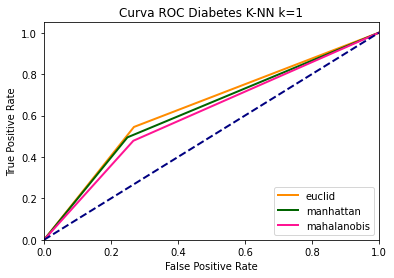

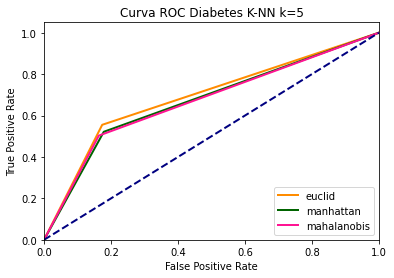

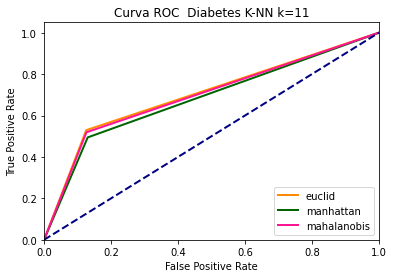

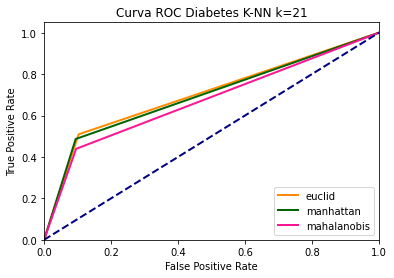

In [50]:
	euclid_1_x[1] /= len(particiones)
	euclid_1_y[1] /= len(particiones)
	euclid_5_x[1] /= len(particiones)
	euclid_5_y[1] /= len(particiones)
	euclid_11_x[1] /= len(particiones)
	euclid_11_y[1] /= len(particiones)
	euclid_21_x[1] /= len(particiones)
	euclid_21_y[1] /= len(particiones)
	manhatt_1_x[1] /= len(particiones)
	manhatt_1_y[1] /= len(particiones)
	manhatt_5_x[1] /= len(particiones)
	manhatt_5_y[1] /= len(particiones)
	manhatt_11_x[1] /= len(particiones)
	manhatt_11_y[1] /= len(particiones)
	manhatt_21_x[1] /= len(particiones)
	manhatt_21_y[1] /= len(particiones)
	mahalan_1_x[1] /= len(particiones)
	mahalan_1_y[1] /= len(particiones)
	mahalan_5_x[1] /= len(particiones)
	mahalan_5_y[1] /= len(particiones)
	mahalan_11_x[1] /= len(particiones)
	mahalan_11_y[1] /= len(particiones)
	mahalan_21_x[1] /= len(particiones)
	mahalan_21_y[1] /= len(particiones)

	repr_grafica('Curva ROC Diabetes K-NN k=1', 'False Positive Rate', 'True Positive Rate', 3,
				 ['euclid', 'manhattan', 'mahalanobis'], ['darkorange', 'darkgreen', 'deeppink'],
				 [euclid_1_x, manhatt_1_x, mahalan_1_x], [euclid_1_y, manhatt_1_y, mahalan_1_y])
	repr_grafica('Curva ROC Diabetes K-NN k=5', 'False Positive Rate', 'True Positive Rate', 3,
				 ['euclid', 'manhattan', 'mahalanobis'], ['darkorange', 'darkgreen', 'deeppink'],
				 [euclid_5_x, manhatt_5_x, mahalan_5_x], [euclid_5_y, manhatt_5_y, mahalan_5_y])
	repr_grafica('Curva ROC  Diabetes K-NN k=11', 'False Positive Rate', 'True Positive Rate', 3,
				 ['euclid', 'manhattan', 'mahalanobis'], ['darkorange', 'darkgreen', 'deeppink'],
				 [euclid_11_x, manhatt_11_x, mahalan_11_x], [euclid_11_y, manhatt_11_y, mahalan_11_y])
	repr_grafica('Curva ROC Diabetes K-NN k=21', 'False Positive Rate', 'True Positive Rate', 3,
				 ['euclid', 'manhattan', 'mahalanobis'], ['darkorange', 'darkgreen', 'deeppink'],
				 [euclid_21_x, manhatt_21_x, mahalan_21_x], [euclid_21_y, manhatt_21_y, mahalan_21_y])

Como vemos en el análisis ROC, a más vecinos, mejores resultados. También observamos como se acrecienta la diferencia entre las distintas formas de calcular la distancia a medida que incrementamos K.

In [51]:
	euclid_1_x = [0, 0, 1]
	euclid_1_y = [0, 0, 1]
	euclid_5_x = [0, 0, 1]
	euclid_5_y = [0, 0, 1]
	euclid_11_x = [0, 0, 1]
	euclid_11_y = [0, 0, 1]
	euclid_21_x = [0, 0, 1]
	euclid_21_y = [0, 0, 1]
	manhatt_1_x = [0, 0, 1]
	manhatt_1_y = [0, 0, 1]
	manhatt_5_x = [0, 0, 1]
	manhatt_5_y = [0, 0, 1]
	manhatt_11_x = [0, 0, 1]
	manhatt_11_y = [0, 0, 1]
	manhatt_21_x = [0, 0, 1]
	manhatt_21_y = [0, 0, 1]
	mahalan_1_x = [0, 0, 1]
	mahalan_1_y = [0, 0, 1]
	mahalan_5_x = [0, 0, 1]
	mahalan_5_y = [0, 0, 1]
	mahalan_11_x = [0, 0, 1]
	mahalan_11_y = [0, 0, 1]
	mahalan_21_x = [0, 0, 1]
	mahalan_21_y = [0, 0, 1]

In [52]:
	# K-NN -> WDBC
	knn = ClasificadorVecinosProximos()
	vc = ValidacionCruzada()
	vc.creaParticiones(wdbc.datos)
	particiones = vc.particiones
	for particion in particiones:
		knn.entrenamiento(wdbc.extraeDatos(particion.indicesTrain), wdbc.nominalAtributos, wdbc.diccionario)
		datosTest = wdbc.extraeDatos(particion.indicesTest)
		result = knn.clasifica(datosTest, wdbc.nominalAtributos, wdbc.diccionario)
		clase = datosTest[:, len(wdbc.nominalAtributos) - 1]
		for i in range(0, len(result)):
			tp, tn, fp, fn = valores_roc(clase, result[i])

			# i va de 0 a 1
			# i = 0, 1, 2 => k = 1
			# i = 3, 4, 5 => k = 5
			# i = 6, 7, 8 => k = 11
			# i = 9, 10, 11 => k = 21
			# i = 0, 3, 6, 9 => Distancia Euclidea
			# i = 1, 4, 7, 10 => Distancia de Manhattan
			# i = 2, 5, 8, 11 => Distancia de Mahalanobis
			tpr = tp / (tp + fn)
			fpr = fp / (fp + tn)

			if i == 0:
				euclid_1_x[1] += fpr
				euclid_1_y[1] += tpr
			elif i == 1:
				manhatt_1_x[1] += fpr
				manhatt_1_y[1] += tpr
			elif i == 2:
				mahalan_1_x[1] += fpr
				mahalan_1_y[1] += tpr
			elif i == 3:
				euclid_5_x[1] += fpr
				euclid_5_y[1] += tpr
			elif i == 4:
				manhatt_5_x[1] += fpr
				manhatt_5_y[1] += tpr
			elif i == 5:
				mahalan_5_x[1] += fpr
				mahalan_5_y[1] += tpr
			elif i == 6:
				euclid_11_x[1] += fpr
				euclid_11_y[1] += tpr
			elif i == 7:
				manhatt_11_x[1] += fpr
				manhatt_11_y[1] += tpr
			elif i == 8:
				mahalan_11_x[1] += fpr
				mahalan_11_y[1] += tpr
			elif i == 9:
				euclid_21_x[1] += fpr
				euclid_21_y[1] += tpr
			elif i == 10:
				manhatt_21_x[1] += fpr
				manhatt_21_y[1] += tpr
			elif i == 11:
				mahalan_21_x[1] += fpr
				mahalan_21_y[1] += tpr


In [53]:

	euclid_1_x[1] /= len(particiones)
	euclid_1_y[1] /= len(particiones)
	euclid_5_x[1] /= len(particiones)
	euclid_5_y[1] /= len(particiones)
	euclid_11_x[1] /= len(particiones)
	euclid_11_y[1] /= len(particiones)
	euclid_21_x[1] /= len(particiones)
	euclid_21_y[1] /= len(particiones)
	manhatt_1_x[1] /= len(particiones)
	manhatt_1_y[1] /= len(particiones)
	manhatt_5_x[1] /= len(particiones)
	manhatt_5_y[1] /= len(particiones)
	manhatt_11_x[1] /= len(particiones)
	manhatt_11_y[1] /= len(particiones)
	manhatt_21_x[1] /= len(particiones)
	manhatt_21_y[1] /= len(particiones)
	mahalan_1_x[1] /= len(particiones)
	mahalan_1_y[1] /= len(particiones)
	mahalan_5_x[1] /= len(particiones)
	mahalan_5_y[1] /= len(particiones)
	mahalan_11_x[1] /= len(particiones)
	mahalan_11_y[1] /= len(particiones)
	mahalan_21_x[1] /= len(particiones)
	mahalan_21_y[1] /= len(particiones)


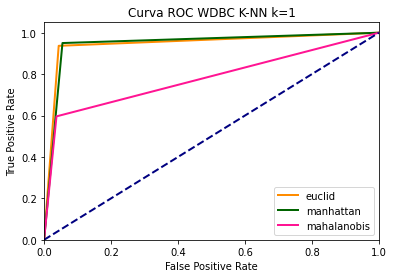

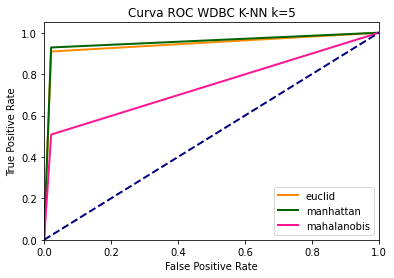

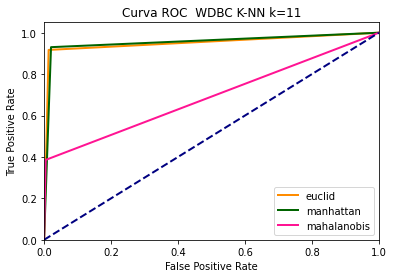

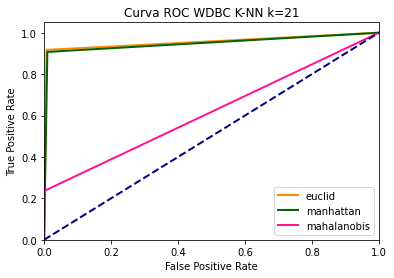

In [54]:

	repr_grafica('Curva ROC WDBC K-NN k=1', 'False Positive Rate', 'True Positive Rate', 3,
				 ['euclid', 'manhattan', 'mahalanobis'], ['darkorange', 'darkgreen', 'deeppink'],
				 [euclid_1_x, manhatt_1_x, mahalan_1_x], [euclid_1_y, manhatt_1_y, mahalan_1_y])
	repr_grafica('Curva ROC WDBC K-NN k=5', 'False Positive Rate', 'True Positive Rate', 3,
				 ['euclid', 'manhattan', 'mahalanobis'], ['darkorange', 'darkgreen', 'deeppink'],
				 [euclid_5_x, manhatt_5_x, mahalan_5_x], [euclid_5_y, manhatt_5_y, mahalan_5_y])
	repr_grafica('Curva ROC  WDBC K-NN k=11', 'False Positive Rate', 'True Positive Rate', 3,
				 ['euclid', 'manhattan', 'mahalanobis'], ['darkorange', 'darkgreen', 'deeppink'],
				 [euclid_11_x, manhatt_11_x, mahalan_11_x], [euclid_11_y, manhatt_11_y, mahalan_11_y])
	repr_grafica('Curva ROC WDBC K-NN k=21', 'False Positive Rate', 'True Positive Rate', 3,
				 ['euclid', 'manhattan', 'mahalanobis'], ['darkorange', 'darkgreen', 'deeppink'],
				 [euclid_21_x, manhatt_21_x, mahalan_21_x], [euclid_21_y, manhatt_21_y, mahalan_21_y])

En el caso de wdbc obtenemos mejores resultados con KNN. Aquí se acrecenta aún más la diferencia entre mahalanobis y las demás distancias.

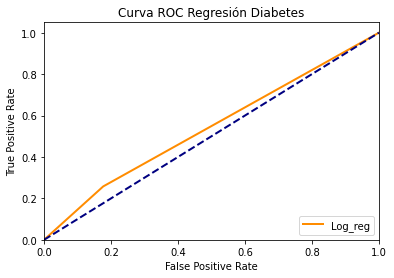

In [55]:
	x = [0, 0, 1]
	y = [0, 0, 1]
	# Regresión -> Diabetes
	reg = ClasificadorRegresionLogistica()
	vc = ValidacionCruzada()
	vc.creaParticiones(diabetes.datos)
	particiones = vc.particiones
	for particion in particiones:
		reg.entrenamiento(diabetes.extraeDatos(particion.indicesTrain), diabetes.nominalAtributos, diabetes.diccionario)
		datosTest = diabetes.extraeDatos(particion.indicesTest)
		result = reg.clasifica(datosTest, diabetes.nominalAtributos, diabetes.diccionario)
		clase = datosTest[:, len(diabetes.nominalAtributos) - 1]
		for i in range(0, len(result)):
			tp, tn, fp, fn = valores_roc(clase, result[i])
			tpr = tp / (tp + fn)
			fpr = fp / (fp + tn)
			x[1] += fpr
			y[1] += tpr
	x[1] /= len(particiones)
	y[1] /= len(particiones)
	repr_grafica('Curva ROC Regresión Diabetes', 'False Positive Rate', 'True Positive Rate', 1,['Log_reg'],
				 ['darkorange'], [x], [y])


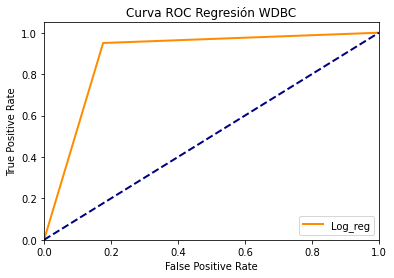

In [56]:
	x = [0, 0, 1]
	y = [0, 0, 1]
	# Regresión -> WDBC
	reg = ClasificadorRegresionLogistica()
	vc = ValidacionCruzada()
	vc.creaParticiones(wdbc.datos)
	particiones = vc.particiones
	for particion in particiones:
		reg.entrenamiento(wdbc.extraeDatos(particion.indicesTrain), wdbc.nominalAtributos, wdbc.diccionario)
		datosTest = wdbc.extraeDatos(particion.indicesTest)
		result = reg.clasifica(datosTest, wdbc.nominalAtributos, wdbc.diccionario)
		clase = datosTest[:, len(wdbc.nominalAtributos) - 1]
		for i in range(0, len(result)):
			tp, tn, fp, fn = valores_roc(clase, result[i])
			tpr = tp / (tp + fn)
			fpr = fp / (fp + tn)
			x[1] += fpr
			y[1] += tpr
	x[1] /= len(particiones)
	y[1] /= len(particiones)
	repr_grafica('Curva ROC Regresión WDBC', 'False Positive Rate', 'True Positive Rate', 1, ['Log_reg'],
				 ['darkorange'], [x], [y])



En el caso de las curvas ROC de la regresión logística podemos observar la enorme dependencia que tiene la efectividad de un método de la distribución de los datos estudiados.